<a href="https://colab.research.google.com/github/denacahyasp2/SIB-AI-4-Jobs/blob/main/Dena_ML_6_Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

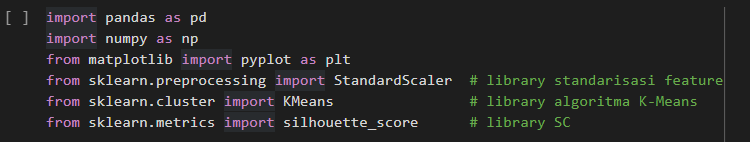

In [ ]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

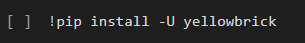

In [ ]:
# Tulis di sini
! pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

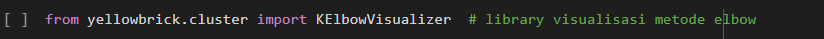

In [ ]:
# Tulis di sini
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

In [ ]:
!wget Mall_Customer.csv https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv

--2022-09-20 07:15:39--  http://mall_customer.csv/
Resolving mall_customer.csv (mall_customer.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customer.csv’
--2022-09-20 07:15:39--  https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [text/plain]
Saving to: ‘Mall_Customers.csv.1’

Mall_Customers.csv. 100%[===================>]   4.66K  --.-KB/s    in 0s      

2022-09-20 07:15:39 (42.4 MB/s) - ‘Mall_Customers.csv.1’ saved [4767/4767]

FINISHED --2022-09-20 07:15:39--
Total wall clock time: 0.2s
Downloaded: 1 files, 4.7K in 0s (42.4 MB/s)


Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

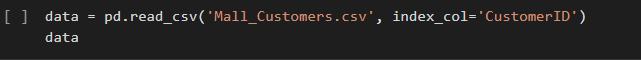

In [ ]:
# Tulis di sini
data = pd.read_csv('https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv')
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
235,209,Female,35,1207,79
236,210,Female,45,126,182
237,211,Male,32,126,174
238,212,Male,32,137,192


Memeriksa kelengkapan dataset.

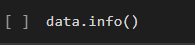

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [ ]:
# Tulis di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     240 non-null    int64 
 1   Gender         240 non-null    object
 2   Age            240 non-null    int64 
 3   AnnualIncome   240 non-null    int64 
 4   SpendingScore  240 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.5+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

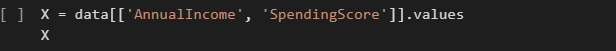

In [ ]:
# Tulis di sini
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

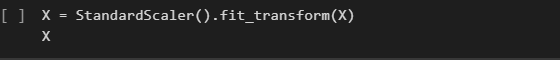

In [ ]:
# Tulis di sini
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



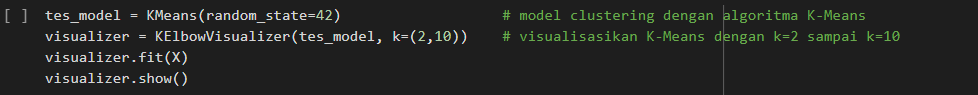

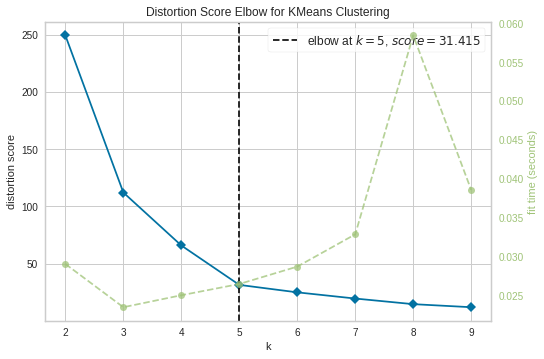

In [ ]:
# Tulis di sini
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

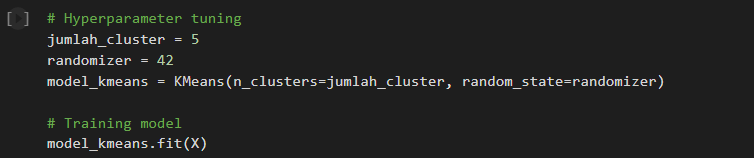

In [ ]:
# Tulis di sini
jumlah_cluster = 5
raindomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=raindomizer)

model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

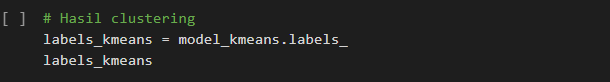

In [ ]:
# Tulis di sini
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1,
       0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

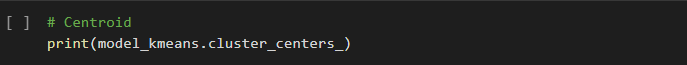

In [ ]:
# Tulis di sini
print(model_kmeans.cluster_centers_)

[[-0.09894748 -1.20506271]
 [-0.11772005  0.91897759]
 [ 7.52694521 -0.11868539]
 [ 0.37342132  4.15876808]
 [-0.17079383 -0.15322869]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

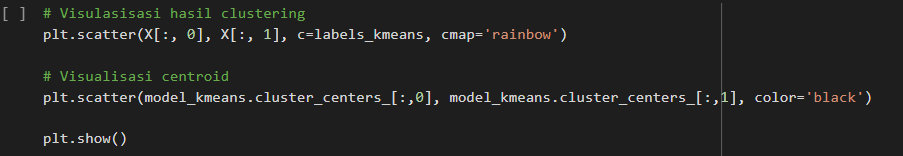

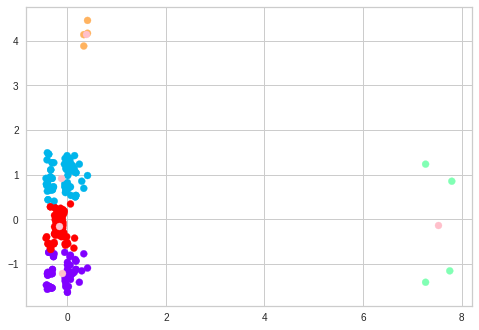

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='pink')
plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

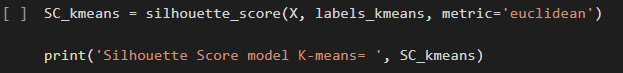

In [ ]:
# Tulis si sini
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

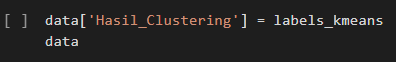

In [ ]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
235,209,Female,35,1207,79,2
236,210,Female,45,126,182,3
237,211,Male,32,126,174,3
238,212,Male,32,137,192,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 39 to 183
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    240 non-null    int64 
 1   Gender        240 non-null    object
 2   Age           240 non-null    int64 
 3   AnnualIncome  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

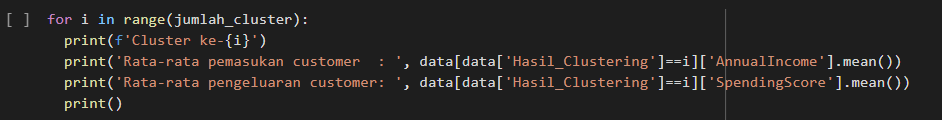

In [ ]:
# Tulis di sini
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer: ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer :  63.12280701754386
Rata-rata pengeluaran customer:  14.403508771929825

Cluster ke-1
Rata-rata pemasukan customer :  60.4054054054054
Rata-rata pengeluaran customer:  81.06756756756756

Cluster ke-2
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer:  48.5

Cluster ke-3
Rata-rata pemasukan customer :  131.5
Rata-rata pengeluaran customer:  182.75

Cluster ke-4
Rata-rata pemasukan customer :  52.722772277227726
Rata-rata pengeluaran customer:  47.415841584158414



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Activity ML-6

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [ ]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!wget Mall_Customer.csv https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv

--2022-09-20 07:25:13--  http://mall_customer.csv/
Resolving mall_customer.csv (mall_customer.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘mall_customer.csv’
--2022-09-20 07:25:13--  https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4767 (4.7K) [text/plain]
Saving to: ‘Mall_Customers.csv.2’

Mall_Customers.csv. 100%[===================>]   4.66K  --.-KB/s    in 0s      

2022-09-20 07:25:13 (60.4 MB/s) - ‘Mall_Customers.csv.2’ saved [4767/4767]

FINISHED --2022-09-20 07:25:13--
Total wall clock time: 0.2s
Downloaded: 1 files, 4.7K in 0s (60.4 MB/s)


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv')
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
235,209,Female,35,1207,79
236,210,Female,45,126,182
237,211,Male,32,126,174
238,212,Male,32,137,192


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv', index_col='Age')
data

,CustomerID,Gender,AnnualIncome,SpendingScore
Age,,,,
19,1,Male,15,39
21,2,Male,15,81
20,3,Female,16,6
23,4,Female,16,77
31,5,Female,17,40
...,...,...,...,...
35,209,Female,1207,79
45,210,Female,126,182
32,211,Male,126,174


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv', index_col='AnnualIncome')
data

,CustomerID,Gender,Age,SpendingScore
AnnualIncome,,,,
15,1,Male,19,39
15,2,Male,21,81
16,3,Female,20,6
16,4,Female,23,77
17,5,Female,31,40
...,...,...,...,...
1207,209,Female,35,79
126,210,Female,45,182
126,211,Male,32,174


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/denacahyasp2/SIB-AI-4-Jobs/main/Data%20Set/Mall_Customers.csv', index_col='SpendingScore')
data

,CustomerID,Gender,Age,AnnualIncome
SpendingScore,,,,
39,1,Male,19,15
81,2,Male,21,15
6,3,Female,20,16
77,4,Female,23,16
40,5,Female,31,17
...,...,...,...,...
79,209,Female,35,1207
182,210,Female,45,126
174,211,Male,32,126


In [ ]:
X = data[['Age', 'AnnualIncome']].values
X

array([[  19,   15],
       [  21,   15],
       [  20,   16],
       [  23,   16],
       [  31,   17],
       [  22,   17],
       [  35,   18],
       [  23,   18],
       [  64,   19],
       [  30,   19],
       [  67,   19],
       [  35,   19],
       [  58,   20],
       [  24,   20],
       [  37,   20],
       [  22,   20],
       [  35,   21],
       [  20,   21],
       [  52,   23],
       [  35,   23],
       [  35,   24],
       [  25,   24],
       [  46,   25],
       [  31,   25],
       [  54,   28],
       [  29,   28],
       [  45,   28],
       [  35,   28],
       [  40,   29],
       [  23,   29],
       [  60,   30],
       [  21,   30],
       [  53,   33],
       [  18,   33],
       [  49,   33],
       [  21,   33],
       [  42,   34],
       [  30,   34],
       [  36,   37],
       [  20,   37],
       [  65,   38],
       [  24,   38],
       [  48,   39],
       [  31,   39],
       [  49,   39],
       [  24,   39],
       [  50,   40],
       [  27,

In [ ]:
X = StandardScaler().fit_transform(X)
X

array([[-5.63212969e-01, -4.31393298e-01],
       [-5.19454111e-01, -4.31393298e-01],
       [-5.41333540e-01, -4.24485019e-01],
       [-4.75695253e-01, -4.24485019e-01],
       [-3.00659821e-01, -4.17576739e-01],
       [-4.97574682e-01, -4.17576739e-01],
       [-2.13142105e-01, -4.10668459e-01],
       [-4.75695253e-01, -4.10668459e-01],
       [ 4.21361338e-01, -4.03760179e-01],
       [-3.22539250e-01, -4.03760179e-01],
       [ 4.86999625e-01, -4.03760179e-01],
       [-2.13142105e-01, -4.03760179e-01],
       [ 2.90084763e-01, -3.96851899e-01],
       [-4.53815824e-01, -3.96851899e-01],
       [-1.69383247e-01, -3.96851899e-01],
       [-4.97574682e-01, -3.96851899e-01],
       [-2.13142105e-01, -3.89943619e-01],
       [-5.41333540e-01, -3.89943619e-01],
       [ 1.58808189e-01, -3.76127059e-01],
       [-2.13142105e-01, -3.76127059e-01],
       [-2.13142105e-01, -3.69218779e-01],
       [-4.31936395e-01, -3.69218779e-01],
       [ 2.75316149e-02, -3.62310499e-01],
       [-3.

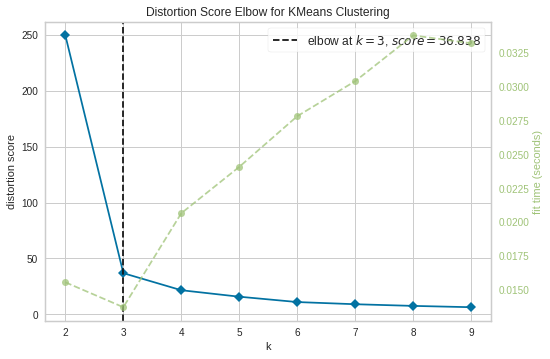

In [ ]:
# Tulis di sini
tes_model = KMeans(random_state=40)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

In [ ]:
jumlah_cluster = 5
raindomizer = 40
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=raindomizer)

model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=40)

In [ ]:
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 4, 3, 0, 0, 4, 0, 0, 3, 0, 0, 3,
       4, 0, 0, 3, 0, 4, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 4, 3, 3, 3, 0, 0, 0, 0, 3, 4, 4, 4, 3, 4, 4, 4, 0, 4, 0, 4,
       3, 4, 3, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 0, 4, 3, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int32)

In [ ]:
print(model_kmeans.cluster_centers_)

[[ 0.2199001  -0.18413071]
 [-0.14203396  7.52694521]
 [ 6.4469561   0.17377203]
 [-0.40658828 -0.27064942]
 [-0.21192658  0.07492605]]


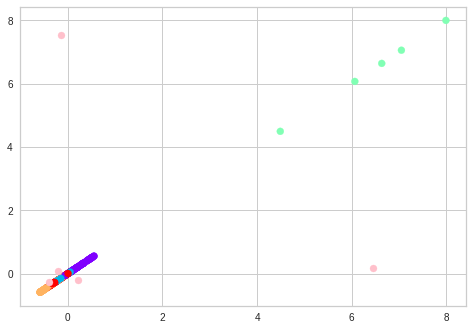

In [ ]:
plt.scatter(X[:, 0], X[:, 0], c=labels_kmeans, cmap='rainbow')
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='pink')
plt.show()